In [290]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (10, 10)
%load_ext autoreload
%autoreload 2

from core.gradient_descent import *
from core.visualizer import *
from core.optimizer_evaluator import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [291]:
# Generate a random matrix
A = generate_positive_definite_quadratic_form(100, 10)

np.diag(A.matrix)

array([ 1.        ,  3.3852776 ,  6.76276492,  1.28176409,  8.46427217,
        5.72772368,  4.69386702,  4.34037964,  1.62784605,  3.16990788,
        8.89606763,  8.38082299,  1.81410269,  5.63044391,  6.78125378,
        3.29996589,  4.01538741,  6.59391734,  7.54808961,  8.82407548,
        6.18136452,  7.69118795,  4.45560043,  6.03403321,  3.52619639,
        8.11139144,  9.63130614,  9.29957135,  8.75476131,  4.91399684,
        2.43231652,  2.94384682,  1.38409821,  4.07632691,  4.65718775,
        3.15792079,  5.0597021 ,  2.60512101,  7.88940055,  4.49251334,
        9.78625533,  1.36087712,  6.56350392,  6.7100439 ,  3.26278086,
        2.8374331 ,  6.85520855,  7.9364047 ,  1.9304    ,  2.56205648,
        8.09963237,  4.50443063,  9.04862229,  3.16114963,  7.82935659,
        8.7487742 ,  4.7890309 ,  4.36150997,  1.77980073,  8.91077478,
        4.72486348,  4.04513887,  6.25267819,  9.6334766 ,  7.84939049,
        6.475239  ,  4.35070229,  8.4218322 ,  4.4580086 ,  3.90

In [292]:
A

QuadraticForm(matrix=array([[ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  3.3852776 ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  6.76276492, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  7.57622132,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         9.06003939,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        , 10.        ]]))

In [293]:
B = generate_positive_definite_quadratic_form(100, 10, random_orthonormal_basis)

B

QuadraticForm(matrix=array([[ 5.31136351,  0.44471937,  0.11392508, ...,  0.31975235,
         0.36851308, -0.55467327],
       [ 0.44471937,  5.33206856, -0.68483077, ..., -0.16637101,
         0.18645743, -0.16956193],
       [ 0.11392508, -0.68483077,  5.54740682, ..., -0.25059552,
        -0.07365971, -0.14079279],
       ...,
       [ 0.31975235, -0.16637101, -0.25059552, ...,  5.45739546,
        -0.21171436, -0.20937797],
       [ 0.36851308,  0.18645743, -0.07365971, ..., -0.21171436,
         4.548028  , -0.47887149],
       [-0.55467327, -0.16956193, -0.14079279, ..., -0.20937797,
        -0.47887149,  5.49757658]]))

In [294]:
b_values = np.sort(np.linalg.eigvals(B.matrix))

In [295]:
print(b_values[0], b_values[-1])  # ≈ 0, 10

1.000000000000005 10.000000000000012


In [296]:
basis = random_orthonormal_basis(2)

v1 = basis[:, 0]
v2 = basis[:, 1]

qf_2d = generate_positive_definite_quadratic_form(2, 10, lambda _n: basis)

In [297]:
qf_2d

QuadraticForm(matrix=array([[ 1.7804186 , -2.53272861],
       [-2.53272861,  9.2195814 ]]))

In [298]:
v1, qf_2d(v1)

(array([-0.95566041, -0.29447101]), 1.0000000000000016)

In [299]:
np.sort(np.linalg.eigvals(qf_2d.matrix))

array([ 1., 10.])

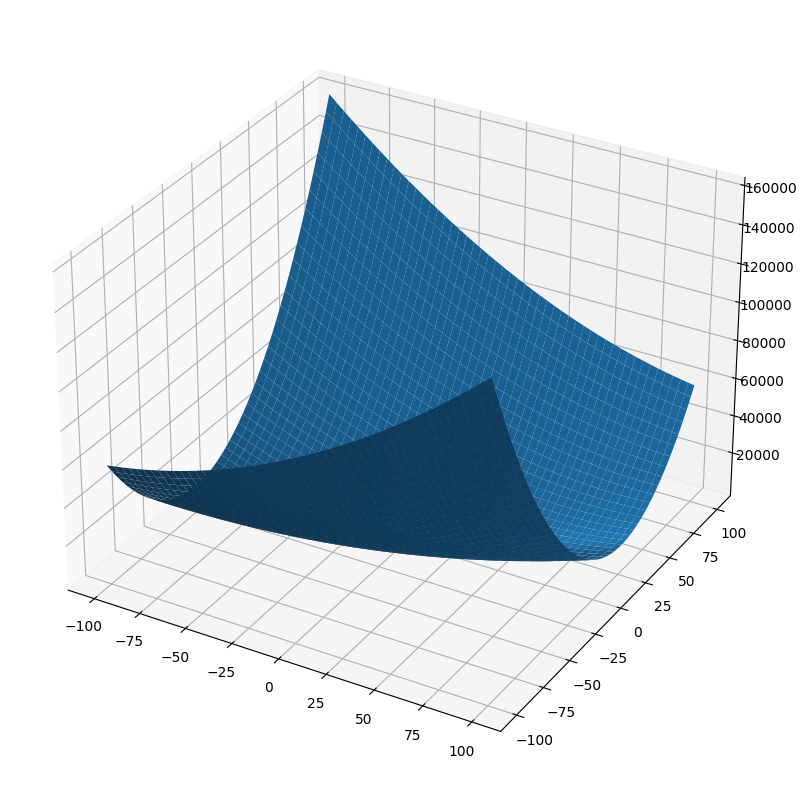

In [300]:
roi = SearchRegion2d((-100, 100), (-100, 100))
visualize_function_3d(qf_2d, roi)

Optimizer trajectory:
[[-3.00000000e+01  2.00000000e+01]
 [-1.95308978e+01 -6.19344481e+00]
 [-1.52075648e+00  1.01038644e+00]
 [-9.90921673e-01 -3.14246763e-01]
 [-7.73712468e-02  5.13116082e-02]
 [-5.04380020e-02 -1.59966498e-02]
 [-3.95853535e-03  2.61627116e-03]
 [-2.58280021e-03 -8.19186593e-04]
 [-2.03254028e-04  1.34093520e-04]
 [-1.32675161e-04 -4.20844163e-05]
 [-1.04945636e-05  6.89994465e-06]
 [-6.85630755e-06 -2.17491592e-06]
 [-5.43761037e-07  3.56885616e-07]
 [-3.55403706e-07 -1.12749333e-07]
 [-2.83312789e-08  1.85308179e-08]
 [-1.85333696e-08 -5.87985217e-09]
 [-1.48116758e-09  9.67160813e-10]
 [-9.69331759e-10 -3.07556342e-10]
 [-7.78678977e-11  5.06698722e-11]
 [-5.10036588e-11 -1.61835175e-11]
 [-4.10728386e-12  2.66828842e-12]]
Best value found: x* = [-4.10728386e-12  2.66828842e-12] with f(x*) = 1.5119096952794486e-22


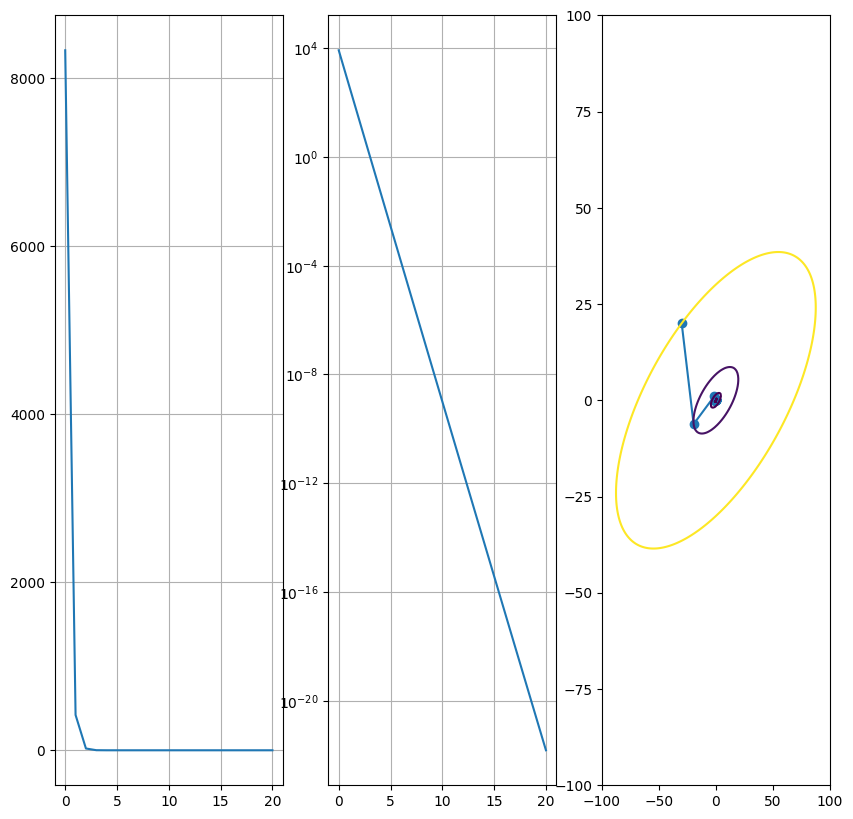

In [304]:
visualize_optimizing_process(qf_2d, roi, np.array(gradient_descent(qf_2d, qf_2d.gradient_function(), np.array([-30, 20]), fibonacci_search(30), lambda f, points: len(points) > 20)), 0)

Optimizer trajectory:
[[-3.00000000e+01  2.00000000e+01]
 [-1.95308978e+01 -6.19344481e+00]
 [-1.52075647e+00  1.01038641e+00]
 [-9.90921673e-01 -3.14246763e-01]
 [-7.73712463e-02  5.13116066e-02]
 [-5.04380020e-02 -1.59966498e-02]
 [-3.95853533e-03  2.61627108e-03]
 [-2.58280021e-03 -8.19186592e-04]
 [-2.03254027e-04  1.34093516e-04]
 [-1.32675161e-04 -4.20844163e-05]
 [-1.04945635e-05  6.89994444e-06]
 [-6.85630755e-06 -2.17491592e-06]
 [-5.43761033e-07  3.56885605e-07]
 [-3.55403706e-07 -1.12749333e-07]
 [-2.83307630e-08  1.85310244e-08]
 [-1.85328935e-08 -5.87970575e-09]
 [-1.48119438e-09  9.67150009e-10]
 [-9.69356515e-10 -3.07563954e-10]
 [-7.78664949e-11  5.06704347e-11]
 [-5.10023639e-11 -1.61831193e-11]
 [-4.10735785e-12  2.66825858e-12]]
Best value found: x* = [-4.10735785e-12  2.66825858e-12] with f(x*) = 1.511909631226636e-22


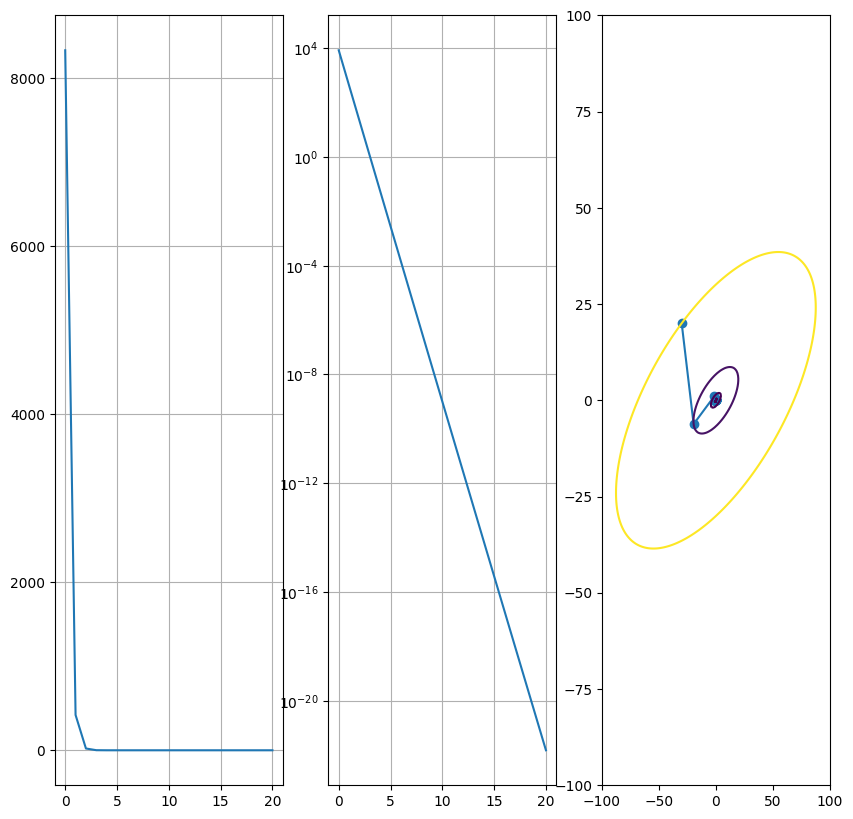

In [306]:
experimental_derivative = symmetric_gradient_computer(qf_2d)
visualize_optimizing_process(qf_2d, roi, np.array(gradient_descent(qf_2d, experimental_derivative, np.array([-30, 20]), fibonacci_search(30), lambda f, points: len(points) > 20)), 0)